Import dependencies

In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from  sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from  sklearn.linear_model import Lasso
from sklearn import metrics

Data Collection and Processing

In [33]:
# Load the dataset 
car_dataset = pd.read_csv('car data.csv')
#import os

# Get the project root based on the notebook's location
#project_root = os.path.abspath(os.path.join(os.getcwd(), '../../'))  # go up to project root

# Create a path to your dataset
#csv_path = os.path.join(project_root, 'Data', 'raw', 'car data.csv')

# Load it
#car_dataset = pd.read_csv(csv_path)


In [34]:
# Preview the data (show first 5 rows)
car_dataset.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [35]:
car_dataset.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [36]:
#checking the number of missing  values
car_dataset.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [37]:
# Checking the distribution of categorical data
print(car_dataset.Fuel_Type.value_counts())
print(car_dataset.Seller_Type.value_counts())
print(car_dataset.Transmission.value_counts())


Fuel_Type
Petrol    239
Diesel     60
CNG         2
Name: count, dtype: int64
Seller_Type
Dealer        195
Individual    106
Name: count, dtype: int64
Transmission
Manual       261
Automatic     40
Name: count, dtype: int64


In [38]:
#encoding categorical data
car_dataset.replace({'Fuel_Type': {'Petrol': 0, 'Diesel': 1, 'CNG': 2}}, inplace=True)
car_dataset.replace({'Seller_Type': {'Dealer': 0, 'Individual': 1}}, inplace=True)
car_dataset.replace({'Transmission': {'Manual': 0, 'Automatic': 1}}, inplace=True)

C:\Users\user\AppData\Local\Temp\ipykernel_4892\401521241.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  car_dataset.replace({'Fuel_Type': {'Petrol': 0, 'Diesel': 1, 'CNG': 2}}, inplace=True)
C:\Users\user\AppData\Local\Temp\ipykernel_4892\401521241.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  car_dataset.replace({'Seller_Type': {'Dealer': 0, 'Individual': 1}}, inplace=True)
C:\Users\user\AppData\Local\Temp\ipykernel_4892\401521241.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed

In [39]:
car_dataset.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0


Splitting the data into Training data and Test data

In [40]:
X=car_dataset.drop(columns=['Car_Name', 'Selling_Price'], axis=1)
Y=car_dataset['Selling_Price']

In [41]:
#X contains all the columns that will be used to predict the target.
print(X)


     Year  Present_Price  Kms_Driven  Fuel_Type  Seller_Type  Transmission  \
0    2014           5.59       27000          0            0             0   
1    2013           9.54       43000          1            0             0   
2    2017           9.85        6900          0            0             0   
3    2011           4.15        5200          0            0             0   
4    2014           6.87       42450          1            0             0   
..    ...            ...         ...        ...          ...           ...   
296  2016          11.60       33988          1            0             0   
297  2015           5.90       60000          0            0             0   
298  2009          11.00       87934          0            0             0   
299  2017          12.50        9000          1            0             0   
300  2016           5.90        5464          0            0             0   

     Owner  
0        0  
1        0  
2        0  
3        0 

In [42]:
#Target variable
print(Y)

0       3.35
1       4.75
2       7.25
3       2.85
4       4.60
       ...  
296     9.50
297     4.00
298     3.35
299    11.50
300     5.30
Name: Selling_Price, Length: 301, dtype: float64


Spliting Training and Test data

In [43]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1, random_state=42)

Model Training

1.Linear Regression

In [44]:
#including the linear regression model
lin_reg_model = LinearRegression()

In [45]:
lin_reg_model.fit(X_train, Y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [46]:
#Model Evaluation
#prediction on training data
training_data_prediction = lin_reg_model.predict(X_train)

#R squared error
training_data_r2_score = metrics.r2_score(Y_train, training_data_prediction) 
print("R squared error on training data:", training_data_r2_score)

R squared error on training data: 0.8806173715719124


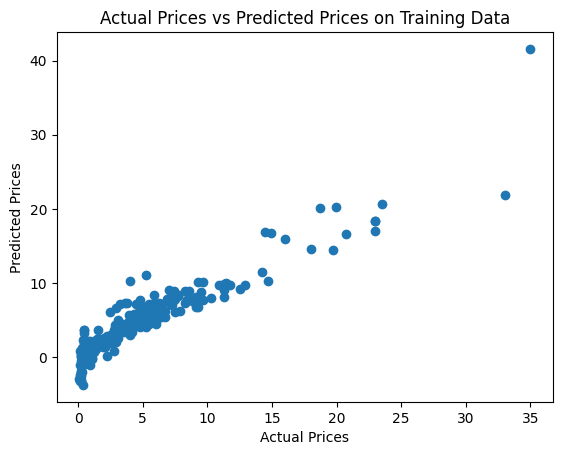

In [47]:
#Visualize the actual prices and Predicted prices

plt.scatter(Y_train, training_data_prediction)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Prices vs Predicted Prices on Training Data")
plt.show()



In [48]:
#Prediction for testdata

test_data_prediction = lin_reg_model.predict(X_test)

In [49]:
#R squared error

error_score=metrics.r2_score(Y_test, test_data_prediction)
print("R squared error on test data:", error_score)

R squared error on test data: 0.831106947624384


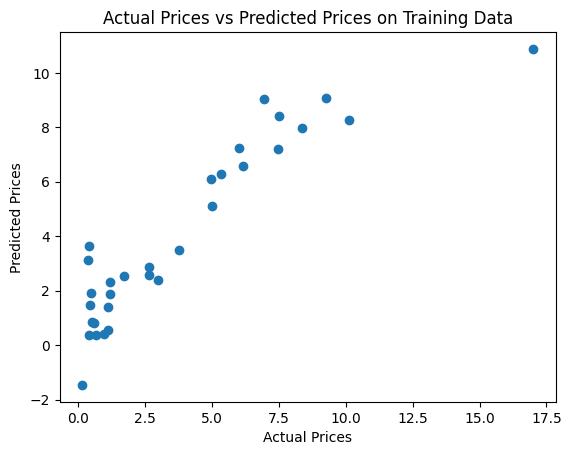

In [50]:
#Visualize the actual prices and Predicted prices

plt.scatter(Y_test, test_data_prediction)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Prices vs Predicted Prices on Training Data")
plt.show()


2.Lasso Regression

In [51]:
#including the lasso regression model
lasso_reg_model = Lasso()
lasso_reg_model.fit(X_train, Y_train)


,alpha,1.0
,fit_intercept,True
,precompute,False
,copy_X,True
,max_iter,1000
,tol,0.0001
,warm_start,False
,positive,False
,random_state,None
,selection,'cyclic'


In [52]:
#Model Evaluation
#prediction on training data
training_data_prediction_lasso = lasso_reg_model.predict(X_train)
#R squared error
training_data_r2_score_lasso = metrics.r2_score(Y_train, training_data_prediction_lasso)
print("R squared error on training data using Lasso Regression:", training_data_r2_score_lasso)


R squared error on training data using Lasso Regression: 0.8436909482009372


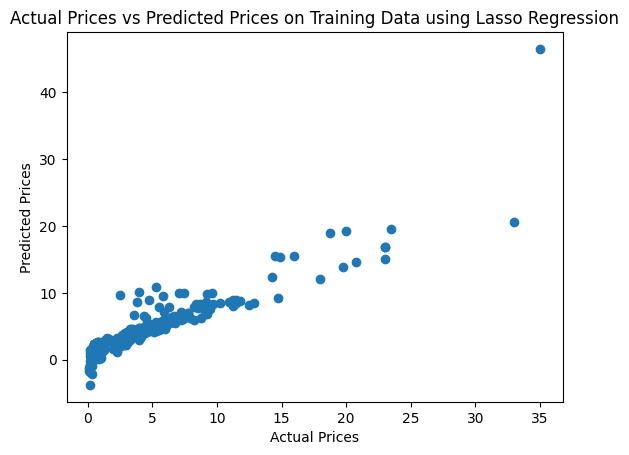

In [53]:
#Visualize the actual prices and Predicted prices using Lasso Regression
plt.scatter(Y_train, training_data_prediction_lasso)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Prices vs Predicted Prices on Training Data using Lasso Regression")
plt.show()




In [54]:
#Prediction for test data using Lasso Regression
test_data_prediction_lasso = lasso_reg_model.predict(X_test)
#R squared error for test data using Lasso Regression
error_score_lasso = metrics.r2_score(Y_test, test_data_prediction_lasso)
print("R squared error on test data using Lasso Regression:", error_score_lasso)


R squared error on test data using Lasso Regression: 0.839226320049874


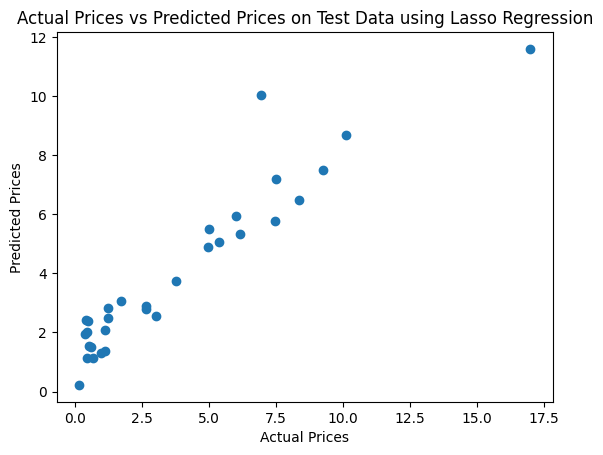

In [55]:
#Visualize the actual prices and Predicted prices using Lasso Regression
plt.scatter(Y_test, test_data_prediction_lasso)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Prices vs Predicted Prices on Test Data using Lasso Regression")
plt.show()



Lasso Regression performs better on the test data (R² = 0.839) compared to Linear Regression (R² = 0.831).

In [56]:
import pickle

# linear_model = LinearRegression().fit(...)
# lasso_model = Lasso().fit(...)

with open('linear_model.pkl', 'wb') as f1:
    pickle.dump(lin_reg_model, f1)

with open('lasso_model.pkl', 'wb') as f2:
    pickle.dump(lasso_reg_model, f2)

